Metrics:
- Sensitivity (Recall) - What % of real events got detected? $\frac{TP}{TP+FN}$
- Specificity - What % of no events got detected? $\frac{TN}{TN+FP}$
- Precision - What % of predicted events where real events? $\frac{TP}{TP+FP}$

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

### Epoch analysis

In [2]:
runs = ['final_default', 'with_scorings', 'pred_hypno']

### Results

In [3]:
cfs_results  = pd.read_csv('68_event_level_evaluation.csv')
mesa_results = pd.read_csv('58_final_results1.csv')

data = pd.concat([cfs_results, mesa_results], ignore_index=True)

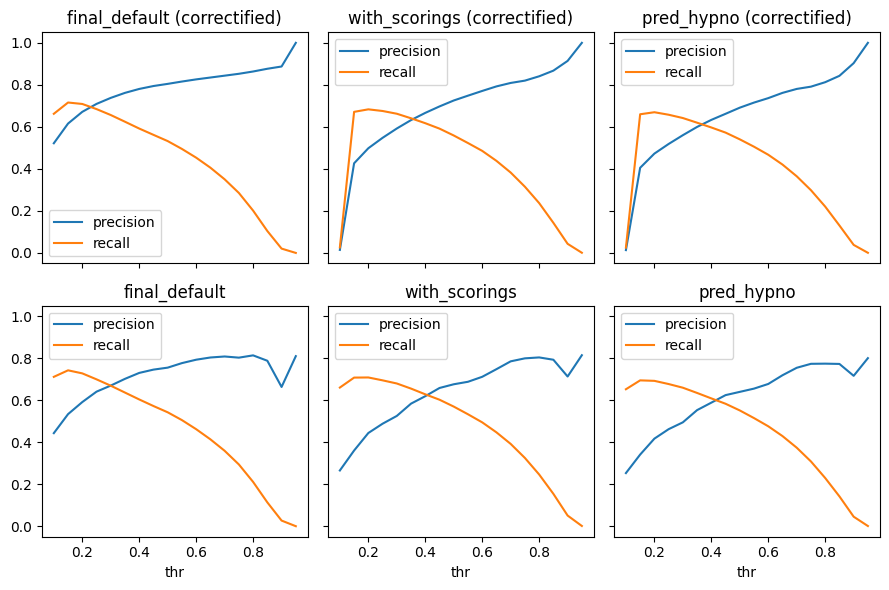

In [4]:
_, axs = plt.subplots(2, len(runs), figsize=(len(runs)*3, 6), sharex=True, sharey=True)
for col, run in enumerate(runs):
    for row, correctify in enumerate([True, False]):
        data[(data['run'] == run) & (data['correctify'] == correctify)][['thr', 'precision', 'recall']].set_index('thr').iloc[1:20].plot(ax=axs[row, col], title=f'{run}{' (correctified)' if correctify else ''}')
plt.tight_layout()

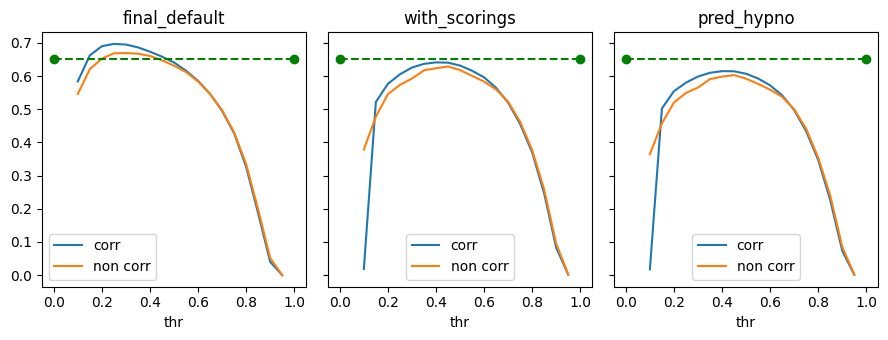

In [5]:
_, axs = plt.subplots(1, len(runs), figsize=(len(runs)*3, 3.5), sharex=True, sharey=True)
for i, run in enumerate(runs):
    for correctify in [True, False]:
        f1_by_thr = data[(data['run'] == run) & (data['correctify'] == correctify)][['thr', 'f1']].set_index('thr')
        f1_by_thr.columns = [f'{'corr' if correctify else 'non corr'}']
        f1_by_thr.iloc[1:20].plot(ax=axs[i], title=run)
    axs[i].plot([0,1], [0.65]*2, color='green', linestyle='dashed', marker='o')
plt.tight_layout()